<a href="https://colab.research.google.com/github/ejini6969/Optimization-Deep-Learning-ODL-/blob/main/Logistic_Regression_Exercise_(Lab_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import packages, functions and classes
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/drive")

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
path = "/content/diabetes.csv"
df = pd.read_csv(path)

In [ ]:
df.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape #768 rows, 9 columns

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Split the dataset into Y = Outcome and X = all the feature variables except Outcome

# Then, split the data into train and test data (test size = 0.25)

In [ ]:
# Outcome is DV
Y = df["Outcome"]
X = df.drop("Outcome", axis = 1)

In [ ]:
#df.groupby(["Outcome"]).count()

In [ ]:
from collections import Counter
Counter(Y)

Counter({1: 268, 0: 500})

In [ ]:
# split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Model
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(X_train, Y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
# the attribute .classes_ represent the array of distinct category
model.classes_

array([0, 1])

In [ ]:
# evaluate the model
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)

Intercept:  [-0.80112587]
Slope:  [[ 0.29219269  1.03124133 -0.20496944  0.09191512 -0.11318663  0.68548176
   0.29163858  0.26267541]]


In [ ]:
# Prediction
model.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
# the accuracy of your model
model.score(X_test, Y_test)

0.8020833333333334

In [ ]:
cm = confusion_matrix(Y_test, model.predict(X_test))
cm

array([[118,  12],
       [ 26,  36]])

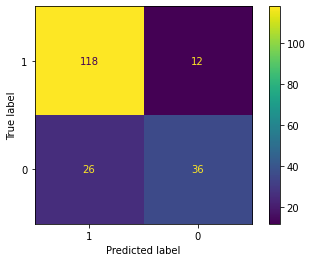

In [ ]:
import numpy as np
from sklearn import metrics

actual = np.random.binomial(1, .9, size = 1000)
predicted = np.random.binomial(1, .9, size = 1000)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [1, 0])
cm_display.plot()
plt.show()

In [ ]:
#comprehensive report on the classification
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"loss": ("hinge", "log", "modified_huber"),
              "penalty": ("l2", "l1", "elasticnet"),
              "alpha": [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
              "max_iter": [1000, 5000, 10000, 20000]
              }
model3 = SGDClassifier(random_state = 0)
clf = GridSearchCV(model3, parameters)
clf.fit(X_train, Y_train)

GridSearchCV(estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'loss': ('hinge', 'log', 'modified_huber'),
                         'max_iter': [1000, 5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [ ]:
clf.best_params_

{'alpha': 0.01,
 'loss': 'modified_huber',
 'max_iter': 1000,
 'penalty': 'elasticnet'}

In [ ]:
clf.best_score_

0.7760269865067466

In [ ]:
clf.best_estimator_.intercept_

array([-0.43514935])

In [ ]:
clf.best_estimator_.coef_

array([[ 0.06830077,  0.39995769, -0.13064099,  0.03632788,  0.        ,
         0.22259395,  0.20363626,  0.14394763]])

## SMOTE: Synthetic Minority Over-sampling Technique (Upsampling)

Upsampling Smaller Class

In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
count_Y_train = Counter(Y_train)
print(count_Y_train)

Counter({0: 370, 1: 206})


In [ ]:
#transform the dataset 
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy = 1,
                   k_neighbors = 5,
                   random_state= 1)
X_train1, Y_train1= oversample.fit_resample(X_train, Y_train)



In [ ]:
count_Y_train1 = Counter(Y_train1)
print(count_Y_train1)

Counter({0: 370, 1: 370})


In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train1 = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test)

In [ ]:
# Logistic Model

model1 = LogisticRegression(solver = 'liblinear', random_state = 0)
model1.fit(X_train1, Y_train1)

# Evaluate the model
print("Intercept: ", model1.intercept_)
print("Slope: ", model1.coef_)

# the accuracy of your model
model1.score(X_test, Y_test)

Intercept:  [0.00452493]
Slope:  [[ 0.30826885  1.09718528 -0.20504076  0.05538349 -0.09296386  0.71091813
   0.40162016  0.29399786]]


0.7864583333333334